<a href="https://colab.research.google.com/github/ashishballa/ashishballa/blob/main/6110_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [19]:
pip install PyHive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyHive: filename=PyHive-0.7.0-py3-none-any.whl size=53872 sha256=f66ac59acd15ad8657f09f42e6aa881e55aa2899b6a59713fd22ea1d2d6daa04
  Stored in directory: /root/.cache/pip/wheels/d3/fc/31/6974270c69ccc5bf8f848e2e41b527d0e8f5b9b973696a29a9
Successfully built PyHive


#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [8]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [9]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [10]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [11]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [12]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [14]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [15]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


# Task 2: Descriptive Statistics

In [22]:
# Calculate basic statistics for "medv"
spark.sql("SELECT AVG(medv) AS mean_medv, STDDEV(medv) AS std_dev_medv, MIN(medv) AS min_medv, MAX(medv) AS max_medv FROM bostonh.bos_housing").show()

# Calculate the mean for "rm"
spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonh.bos_housing").show()


+------------------+-----------------+--------+--------+
|         mean_medv|     std_dev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



# Task 3: Data Exploration

In [23]:
# Identify the property with the highest crime rate
spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY crim DESC LIMIT 1").show()

# Find the property with the lowest median home value
spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY medv ASC LIMIT 1").show()


+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



# Task 4: Data Distribution Analysis

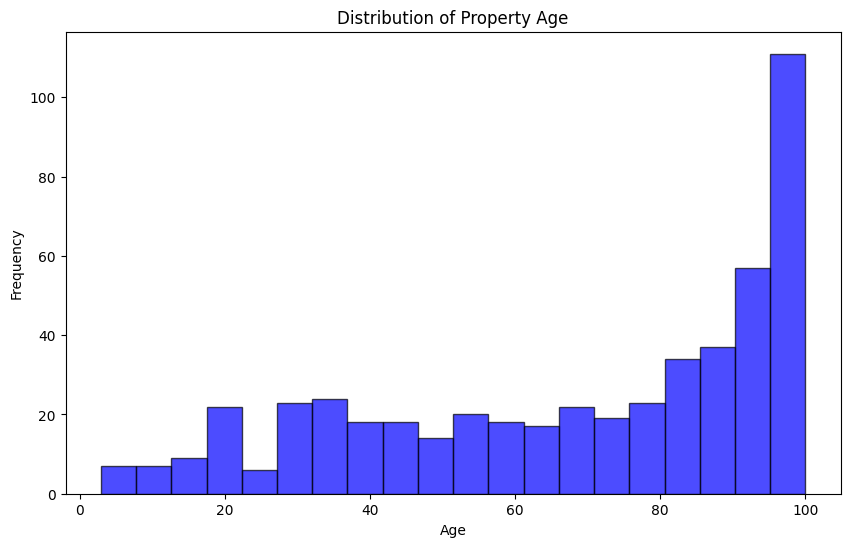

In [26]:
# Convert the "age" column to a Pandas DataFrame
age_df = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()

# Create a histogram for the "age" column
plt.figure(figsize=(10, 6))
plt.hist(age_df['age'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Property Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [34]:
# Fetch the total number of records
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]

# Fetch the number of properties with "chas" value of 1
chas_count = spark.sql("SELECT COUNT(*) AS chas_count FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["chas_count"]

# Calculate the percentage
chas_percentage = (chas_count / total_records) * 100
print(f"Percentage of properties with a 'chas' value of 1 = {chas_percentage}%")


Percentage of properties with a 'chas' value of 1 = 6.91699604743083%


# Task 5: Correlation Analysis

In [35]:
# Calculate the correlation between "rm" and "medv"
spark.sql("SELECT CORR(rm, medv) AS corr_rm_medv FROM bostonh.bos_housing").show()

# Calculate the correlation between "ptratio" and "nox"
spark.sql("SELECT CORR(ptratio, nox) AS corr_ptratio_nox FROM bostonh.bos_housing").show()


+------------------+
|      corr_rm_medv|
+------------------+
|0.6953599470715401|
+------------------+

+-------------------+
|   corr_ptratio_nox|
+-------------------+
|0.18893267711276893|
+-------------------+



# Task 6: Advanced Querying

In [30]:
# Identify and display the top 5 neighborhoods with the highest median home values
spark.sql("SELECT AVG(medv) AS avg_medv, rad FROM bostonh.bos_housing GROUP BY rad ORDER BY avg_medv DESC LIMIT 5").show()

# Calculate the average property age for neighborhoods with a "chas" value of 1
spark.sql("SELECT AVG(age) AS avg_age_chas_1 FROM bostonh.bos_housing WHERE chas = 1").show()

# Calculate the average property age for neighborhoods with a "chas" value of 0
spark.sql("SELECT AVG(age) AS avg_age_chas_0 FROM bostonh.bos_housing WHERE chas = 0").show()



+------------------+---+
|          avg_medv|rad|
+------------------+---+
|30.358333333333334|  8|
|27.928947368421053|  3|
|27.105882352941173|  7|
| 26.83333333333333|  2|
| 25.70695652173912|  5|
+------------------+---+

+-----------------+
|   avg_age_chas_1|
+-----------------+
|77.50000000000001|
+-----------------+

+-----------------+
|   avg_age_chas_0|
+-----------------+
|67.91167728237794|
+-----------------+



# Task 7: Visualization

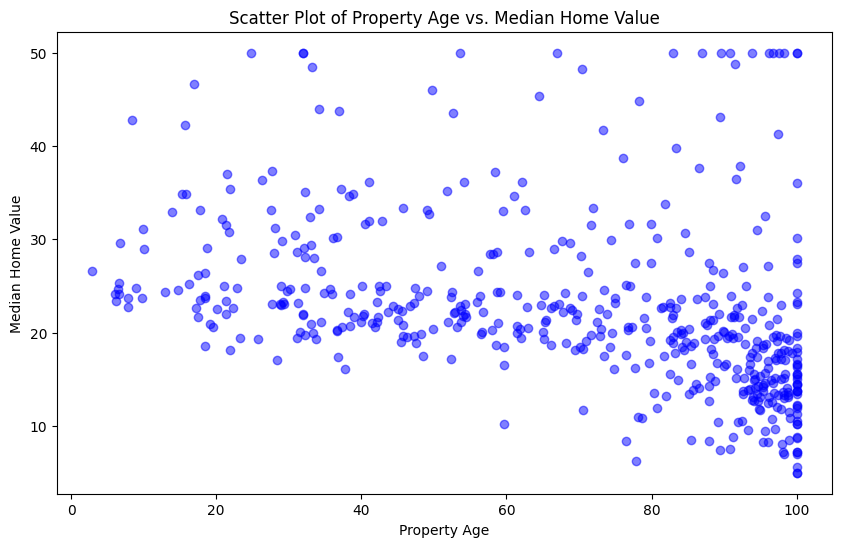

In [31]:
# Create a Hive view that includes "age" and "medv" columns
spark.sql("CREATE OR REPLACE VIEW property_age_view AS SELECT age, medv FROM bostonh.bos_housing")

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Read the Hive view into a Pandas DataFrame
property_age_df = spark.sql("SELECT * FROM property_age_view").toPandas()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(property_age_df['age'], property_age_df['medv'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.show()


# Task 8: Outliers Detection

In [32]:
# Identify properties with "crim" value greater than 10
spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim > 10").show()


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

# Task 9: Hypothesis Testing

In [33]:
from scipy.stats import pearsonr
import pandas as pd

# Read the relevant data into a Pandas DataFrame
data_df = spark.sql("SELECT rm, medv FROM bostonh.bos_housing").toPandas()

# Conduct Pearson correlation test
corr_coeff, p_value = pearsonr(data_df['rm'], data_df['medv'])

# Print the results
print(f'Pearson correlation coefficient: {corr_coeff}')
print(f'P-value: {p_value}')

# Evaluate the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between rm and medv.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between rm and medv.")


Pearson correlation coefficient: 0.6953599470715394
P-value: 2.4872288710080976e-74
Reject the null hypothesis: There is a significant relationship between rm and medv.
